## Required Set Up

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# ingests the data
df = pd.read_csv('telemetry_data.csv')
#df = pd.read_csv("./assets/telemetry.csv")

In [3]:
# inspects the data
df.head(3)

,log_time,Model,confidence,detected bounding box width,detected bounding box height,img xcenter,img ycenter,model output xcenter,model output ycenter,height (distance to floor),is_flying
0,17:11.3,YOLOFaceDetector,9.073048e-01,166.000000,225.000000,480,360,279.000000,87.000000,0,False
1,17:20.5,YOLOObjectDetector,6.927716e-01,676.316956,555.245911,480,360,519.071777,433.902924,0,False
2,17:20.5,DepthPerception,2.430180e+08,NaN,NaN,480,360,NaN,NaN,0,False


In [4]:
# filters the data to extract YOLO and Azure object detection models for comparision
df_object_detect = df[df['Model'].isin(['YOLOObjectDetector', 'AzureObjectDetector'])]

# filters the data to extract YOLO object YOLO face detection models for comparision
df_yolo_detect = df[df['Model'].isin(['YOLOObjectDetector', 'YOLOFaceDetector'])]

df_depth_estimation = df[df['Model'].isin(['DepthPerception'])]

# filters the data to extract all detection models for comparision
df_all_detect = df[df['Model'].isin(['YOLOObjectDetector', 'YOLOFaceDetector', 'AzureObjectDetector'])].copy()

In [5]:
# adds a column for bounding box height
df_all_detect['bounding_box_size'] = df_all_detect['detected bounding box width'] * df_all_detect['detected bounding box height']

In [6]:
# inspects the df
#df_all_detect.head()

## Box / Swarm Plots of YOLO vs. Azure

In [7]:
# adds styling
sns.set(style = 'ticks',
        rc={'figure.figsize' : (6, 9),
            'figure.facecolor' : 'ivory',
            'axes.facecolor' : 'ivory'
           })


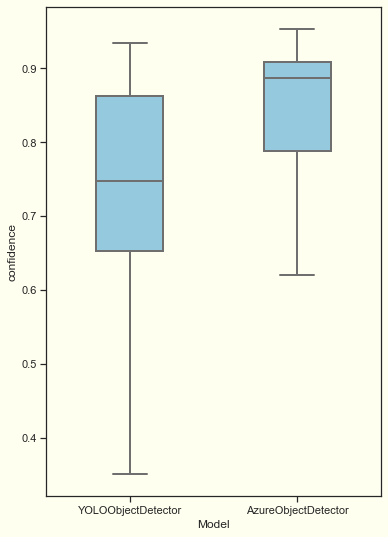

In [8]:
ax_1 = sns.boxplot(data = df_object_detect,
                x = 'Model',
                y = 'confidence',
                width = 0.4,
                color = 'skyblue',
                linewidth = 2,
                showfliers = False
                )

In [9]:
sns.stripplot(data = df_object_detect,
                  x = 'Model',
                  y = 'confidence',
                  color = 'crimson',
                  linewidth = 1,
                  alpha = 0.4,
                  ax = ax_1)

<AxesSubplot:xlabel='Model', ylabel='confidence'>

In [10]:
# adds titles and removes the spine
ax_1.set_ylabel('Confidence', fontsize = 14)
ax_1.set_xlabel('Model', fontsize = 14)
ax_1.set_title('Box / Swarm Plot of Accuracy (Object Detection Models)', fontsize = 16)
sns.despine(offset = 5, trim = True, ax = ax_1)

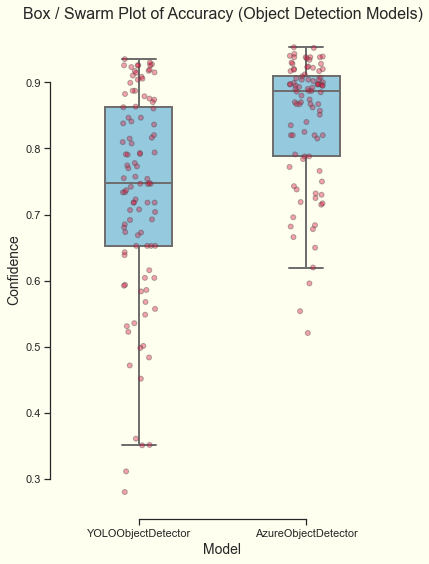

In [11]:
# renders the plot
a = ax_1.get_figure()
a

In [12]:
# saves plot
a.savefig('box_swarm_object_dectect_accuracy.png', dpi = 1000)

## Box / Swarm Plots of YOLO Models

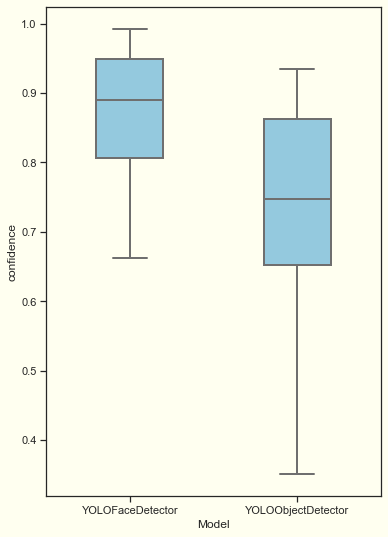

In [13]:
ax_2 = sns.boxplot(data = df_yolo_detect,
                x = 'Model',
                y = 'confidence',
                width = 0.4,
                color = 'skyblue',
                linewidth = 2,
                showfliers = False
                )

In [14]:
sns.stripplot(data = df_yolo_detect,
                  x = 'Model',
                  y = 'confidence',
                  color = 'crimson',
                  linewidth = 1,
                  alpha = 0.4,
                  ax = ax_2)

<AxesSubplot:xlabel='Model', ylabel='confidence'>

In [15]:
# adds titles and removes the spine
ax_2.set_ylabel('Confidence', fontsize = 14)
ax_2.set_xlabel('Model', fontsize = 14)
ax_2.set_title('Box/Swarm Plot of Confidence by Model', fontsize = 16)
sns.despine(offset = 5, trim = True, ax = ax_2)

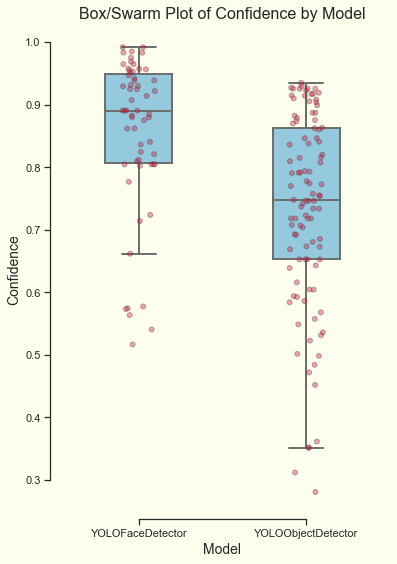

In [16]:
b = ax_2.get_figure()
b

In [17]:
b.savefig('box_swarm_face_dectect_accuracy.png', dpi = 1000)

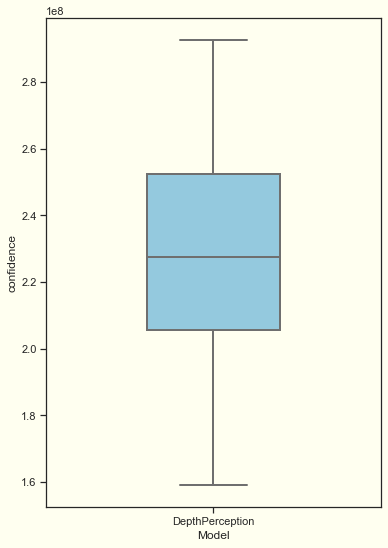

In [18]:
ax_3 = sns.boxplot(data = df_depth_estimation,
                x = 'Model',
                y = 'confidence',
                width = 0.4,
                color = 'skyblue',
                linewidth = 2,
                showfliers = False
                )

In [19]:
# adds titles and removes the spine
ax_3.set_ylabel('Confidence', fontsize = 14)
ax_3.set_xlabel('Model', fontsize = 14)
ax_3.set_title('Box/Swarm Plot of Confidence (ManyDepth)', fontsize = 16)
sns.despine(offset = 5, trim = True, ax = ax_3)

In [20]:
sns.stripplot(data = df_depth_estimation,
                  x = 'Model',
                  y = 'confidence',
                  color = 'crimson',
                  linewidth = 1,
                  alpha = 0.4,
                  ax = ax_3)

<AxesSubplot:title={'center':'Box/Swarm Plot of Confidence (ManyDepth)'}, xlabel='Model', ylabel='confidence'>

In [21]:
c = ax_3.get_figure()

In [22]:
c.savefig('box_swarm_manydepth.png', dpi = 1000)

## Histograms of Accuracy for Detection Models

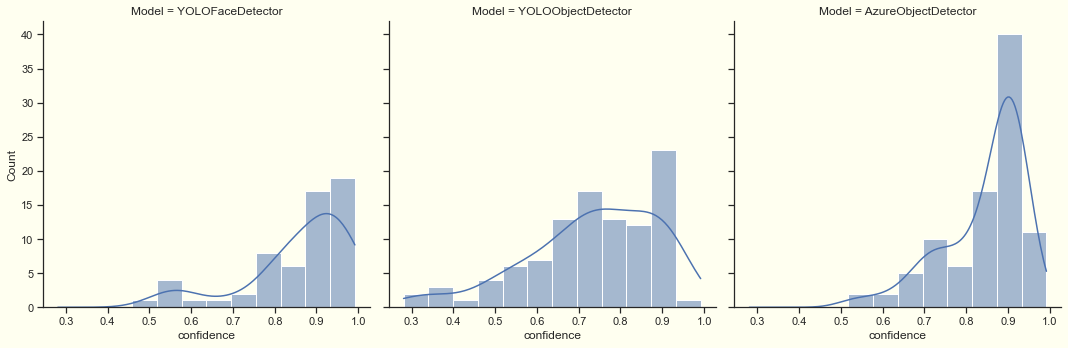

In [23]:
d = sns.displot(data=df_all_detect, kind='hist', kde=True,
            x='confidence', col='Model'
            )

In [24]:
d.savefig('hist_detection_models.png', dpi = 1000)

## Scatter Plots of Accuracy ~ Bounding Box Size

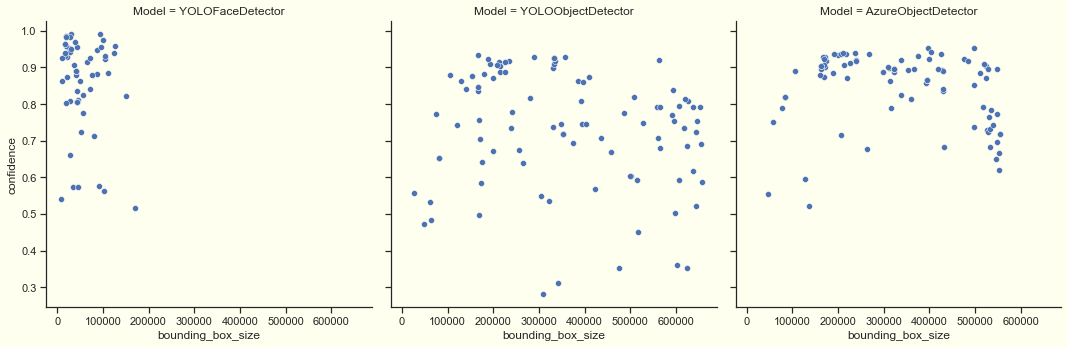

In [25]:
e = sns.relplot(data = df_all_detect,
            col = 'Model', 
            x = 'bounding_box_size', 
            y = 'confidence')

In [26]:
e.savefig('scatter_accuracy_bounding.png', dpi = 1000)

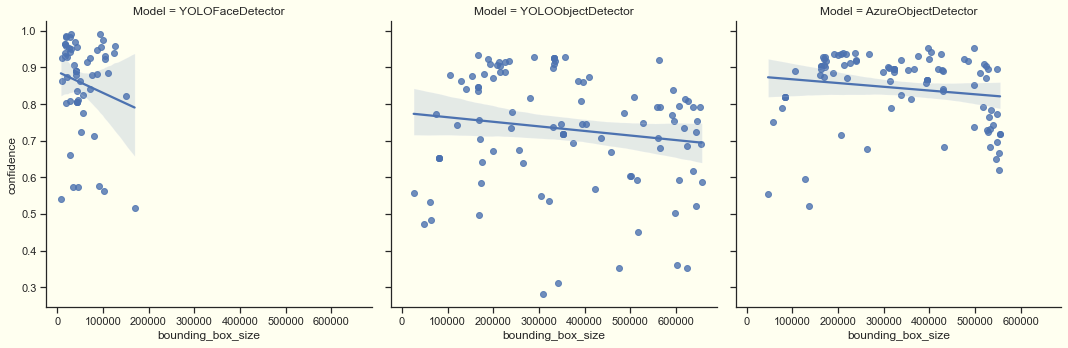

In [27]:
f = sns.lmplot(data = df_all_detect,
            col = 'Model', 
            x = 'bounding_box_size', 
            y = 'confidence')

In [28]:
f.savefig('lmplot_accuracy_bounding.png', dpi = 1000)